# Preprocess Data

### Converted Data Types:

- Gender to string
- Age to int64
- City to string
- Academic Pressure to int
- CGPA to float
- Study Satisfaction to int
- Sleep Duration to string
- Dietary Habits to string
- Degree to string
- Have you ever had suicidal thoughts ? to string
- Financial Stress to int
- Family History of Mental Illness to string
- Depression to string

### Deleted Columns:
- Work Pressure
- Profession

### Filtered Rows:
- Removed rows where Work/Study Hours is 0
- Removed rows where Sleep Duration or Dietary Habits have the value 'Others'

### Renamed Columns:
- Renamed Work/Study Hours to Study Hours

In [96]:
import numpy as np 
import pandas as pd 

In [97]:
# Loading the Data 
data = pd.read_excel('Student_Depression_Dataset.xlsx') 
data.head() 

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [98]:
data.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27,Surat,Student,5,0,5.75,5,0,5-6 hours,Unhealthy,Class 12,Yes,7,1.0,Yes,0
27897,140686,Male,27,Ludhiana,Student,2,0,9.40,3,0,Less than 5 hours,Healthy,MSc,No,0,3.0,Yes,0
27898,140689,Male,31,Faridabad,Student,3,0,6.61,4,0,5-6 hours,Unhealthy,MD,No,12,2.0,No,0
27899,140690,Female,18,Ludhiana,Student,5,0,6.88,2,0,Less than 5 hours,Healthy,Class 12,Yes,10,5.0,No,1
27900,140699,Male,27,Patna,Student,4,0,9.24,1,0,Less than 5 hours,Healthy,BCA,Yes,2,3.0,Yes,1


In [99]:
sample_size = data.shape[0]
print(f"Sample size: {sample_size}")

Sample size: 27901


In [100]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [101]:
# Exploring the columns of the data 
data.columns 

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

#### Data Transformation

In [102]:
# Filter out non-string values
data = data[data['City'].apply(lambda x: isinstance(x, str))]

# List of known non-city strings to remove
non_city_values = ['M.Tech', 'Bhavna', 'Less Delhi', 'City', 'Less than 5 Kalyan', 'ME', 'M.Com']

# Remove rows with known non-city strings
data = data[~data['City'].isin(non_city_values)]
data['Sleep Duration'] = data['Sleep Duration'].str.strip() 

print(data.head())

   id  Gender  Age           City Profession  Academic Pressure  \
0   2    Male   33  Visakhapatnam    Student                  5   
1   8  Female   24      Bangalore    Student                  2   
2  26    Male   31       Srinagar    Student                  3   
3  30  Female   28       Varanasi    Student                  3   
4  32  Female   25         Jaipur    Student                  4   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0              0  8.97                   2                 0   
1              0  5.90                   5                 0   
2              0  7.03                   5                 0   
3              0  5.59                   2                 0   
4              0  8.13                   3                 0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8 hours

In [103]:
data.City.unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'Nalyan', 'Mihir',
       'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

In [104]:
print(data.dtypes)

id                                         int64
Gender                                    object
Age                                        int64
City                                      object
Profession                                object
Academic Pressure                          int64
Work Pressure                              int64
CGPA                                     float64
Study Satisfaction                         int64
Job Satisfaction                           int64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                           int64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object


In [105]:
# Fill or drop non-finite values
data = data.fillna(0)  # or use data.dropna() to drop rows with NA values

In [106]:
# Convert columns to the correct data types
data['Gender'] = data['Gender'].astype(str)
data['Age'] = data['Age'].astype('int64')
data['City'] = data['City'].astype(str)
data['Academic Pressure'] = data['Academic Pressure'].astype(int)
data['CGPA'] = data['CGPA'].astype(float)
data['Study Satisfaction'] = data['Study Satisfaction'].astype(int)
data['Sleep Duration'] = data['Sleep Duration'].astype(str)
data['Dietary Habits'] = data['Dietary Habits'].astype(str)
data['Degree'] = data['Degree'].astype(str)
data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].astype(str)
data['Financial Stress'] = data['Financial Stress'].astype(int)
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].astype(str)
data['Depression'] = data['Depression'].astype(str)

print(data.dtypes)

id                                         int64
Gender                                    object
Age                                        int64
City                                      object
Profession                                object
Academic Pressure                          int32
Work Pressure                              int64
CGPA                                     float64
Study Satisfaction                         int32
Job Satisfaction                           int64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                           int64
Financial Stress                           int32
Family History of Mental Illness          object
Depression                                object
dtype: object


In [107]:
# Delete 'Work Pressure' and 'Profession' columns
data = data.drop(columns=['Work Pressure', 'Profession', 'Job Satisfaction'])

In [108]:
# Rename the column "Work/Study Hours" to "Study Hours"
data = data.rename(columns={"Work/Study Hours": "Study Hours"})

In [109]:
# Delete rows that have 0 'Work/Study Hours'
data = data[data['Study Hours'] != 0]

# Remove rows where 'Sleep Duration' or 'Dietary Habits' have the value 'Others'
data = data[(data['Sleep Duration'] != 'Others') & (data['Dietary Habits'] != 'Others')]


print(data.columns)
for col in data.columns:
    print(data[col].unique())
    

Index(['id', 'Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


[     2      8     26 ... 140689 140690 140699]
['Male' 'Female']
[33 24 31 28 25 29 30 27 19 20 23 18 21 22 34 32 26 39 35 42 36 58 49 38
 51 44 43 46 59 54 48 56 37 41]
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad' 'Chennai'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Meerut' 'Agra'
 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Bhopal' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'Nalyan' 'Mihir' 'Nalini' 'Khaziabad']
[5 2 3 4 1 0]
[ 8.97    5.9     7.03    5.59    8.13    5.7     9.54    9.79    8.38
  6.1     7.04    8.52    5.64    8.58    6.51    7.25    7.83    9.93
  8.74    5.57    8.59    7.1     6.08    5.74    9.86    6.7     6.21
  5.87    6.37    5.88    9.56    6.99    5.24    9.21    7.85    6.95
  5.86    7.92    9.66    8.94    8.04    9.71    7.87    5.6     7.9
  5.46    8.7     7.38    8.5     7.0

### Visualization

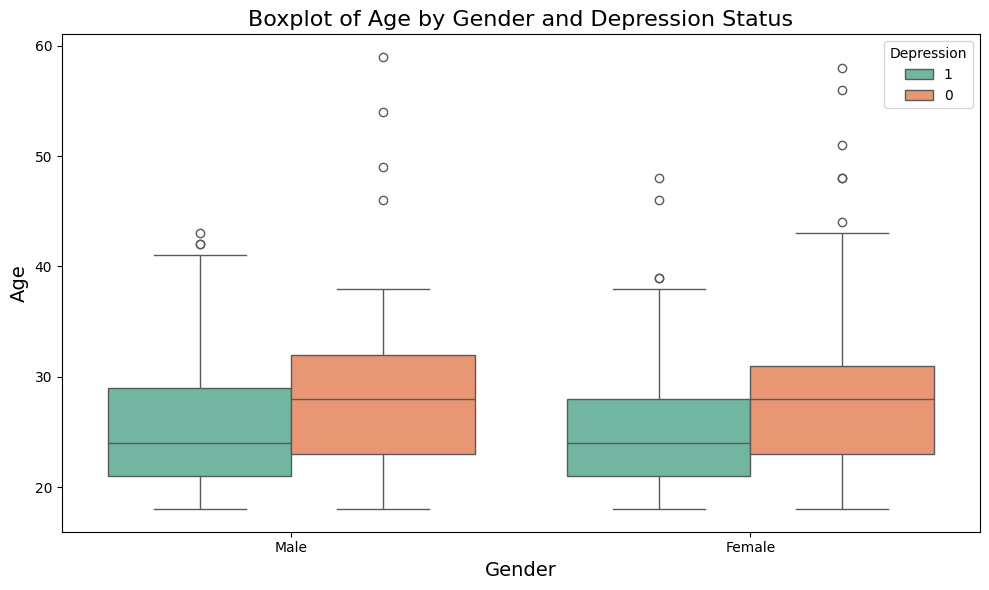

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Boxplot of Age by Gender and Depression Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', hue='Depression', data=data, palette='Set2')

# Adding titles and labels
plt.title('Boxplot of Age by Gender and Depression Status', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.tight_layout()
plt.show()

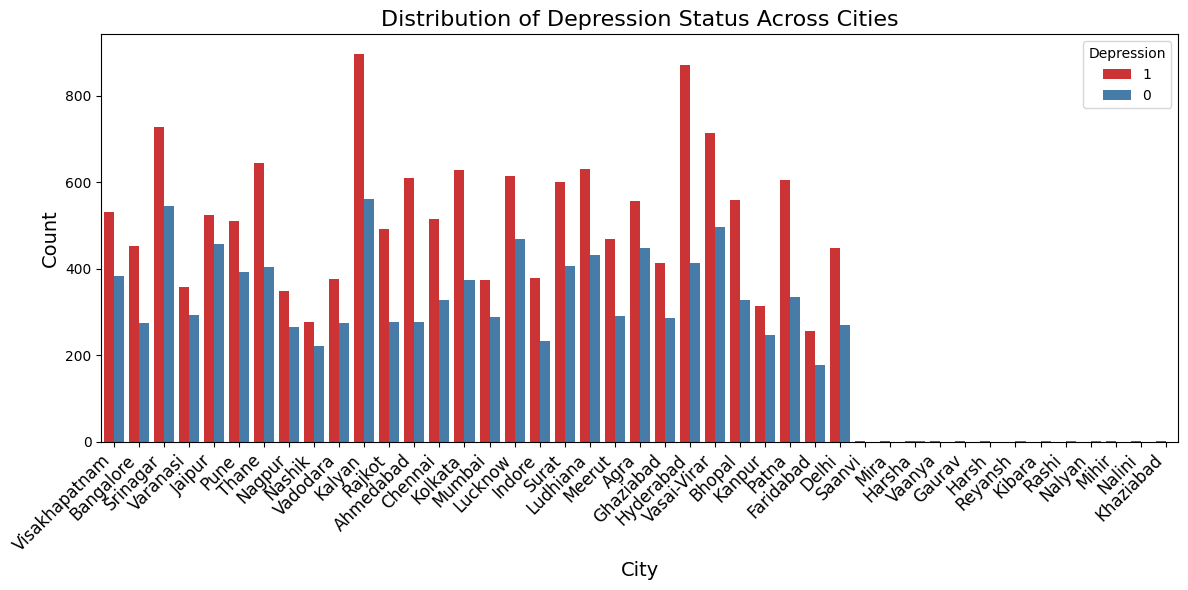

In [111]:
#Distribution of Depression Status Across Cities
plt.figure(figsize=(12, 6))
sns.countplot(x='City', hue='Depression', data=data, palette='Set1')

plt.title('Distribution of Depression Status Across Cities', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('City', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

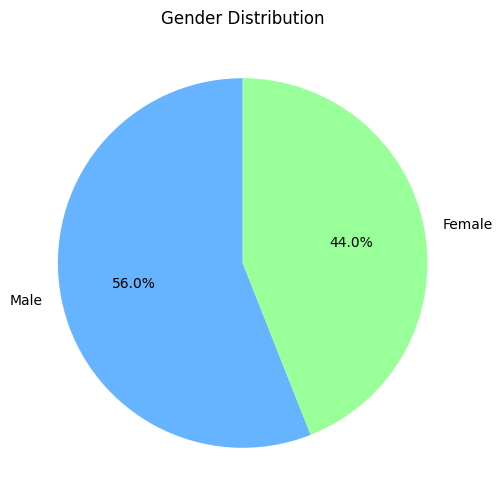

In [112]:
#Gender Distribution
gender_counts = data['Gender'].value_counts()  # Count the occurrences of each gender

# Create a pie chart
plt.figure(figsize=(8, 6))
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffb3e6'])
plt.title('Gender Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()

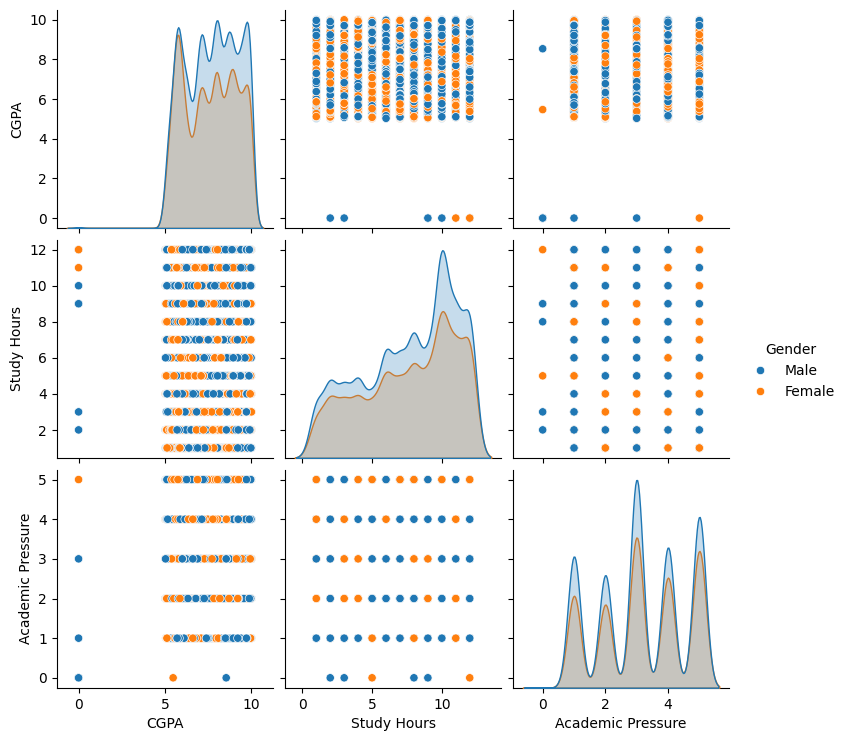

In [113]:
#Pairplot for CGPA, Study Hours, Academic Pressure, with Gender
sns.pairplot(data, vars=['CGPA', 'Study Hours', 'Academic Pressure'], hue='Gender', diag_kind='kde')
plt.show()

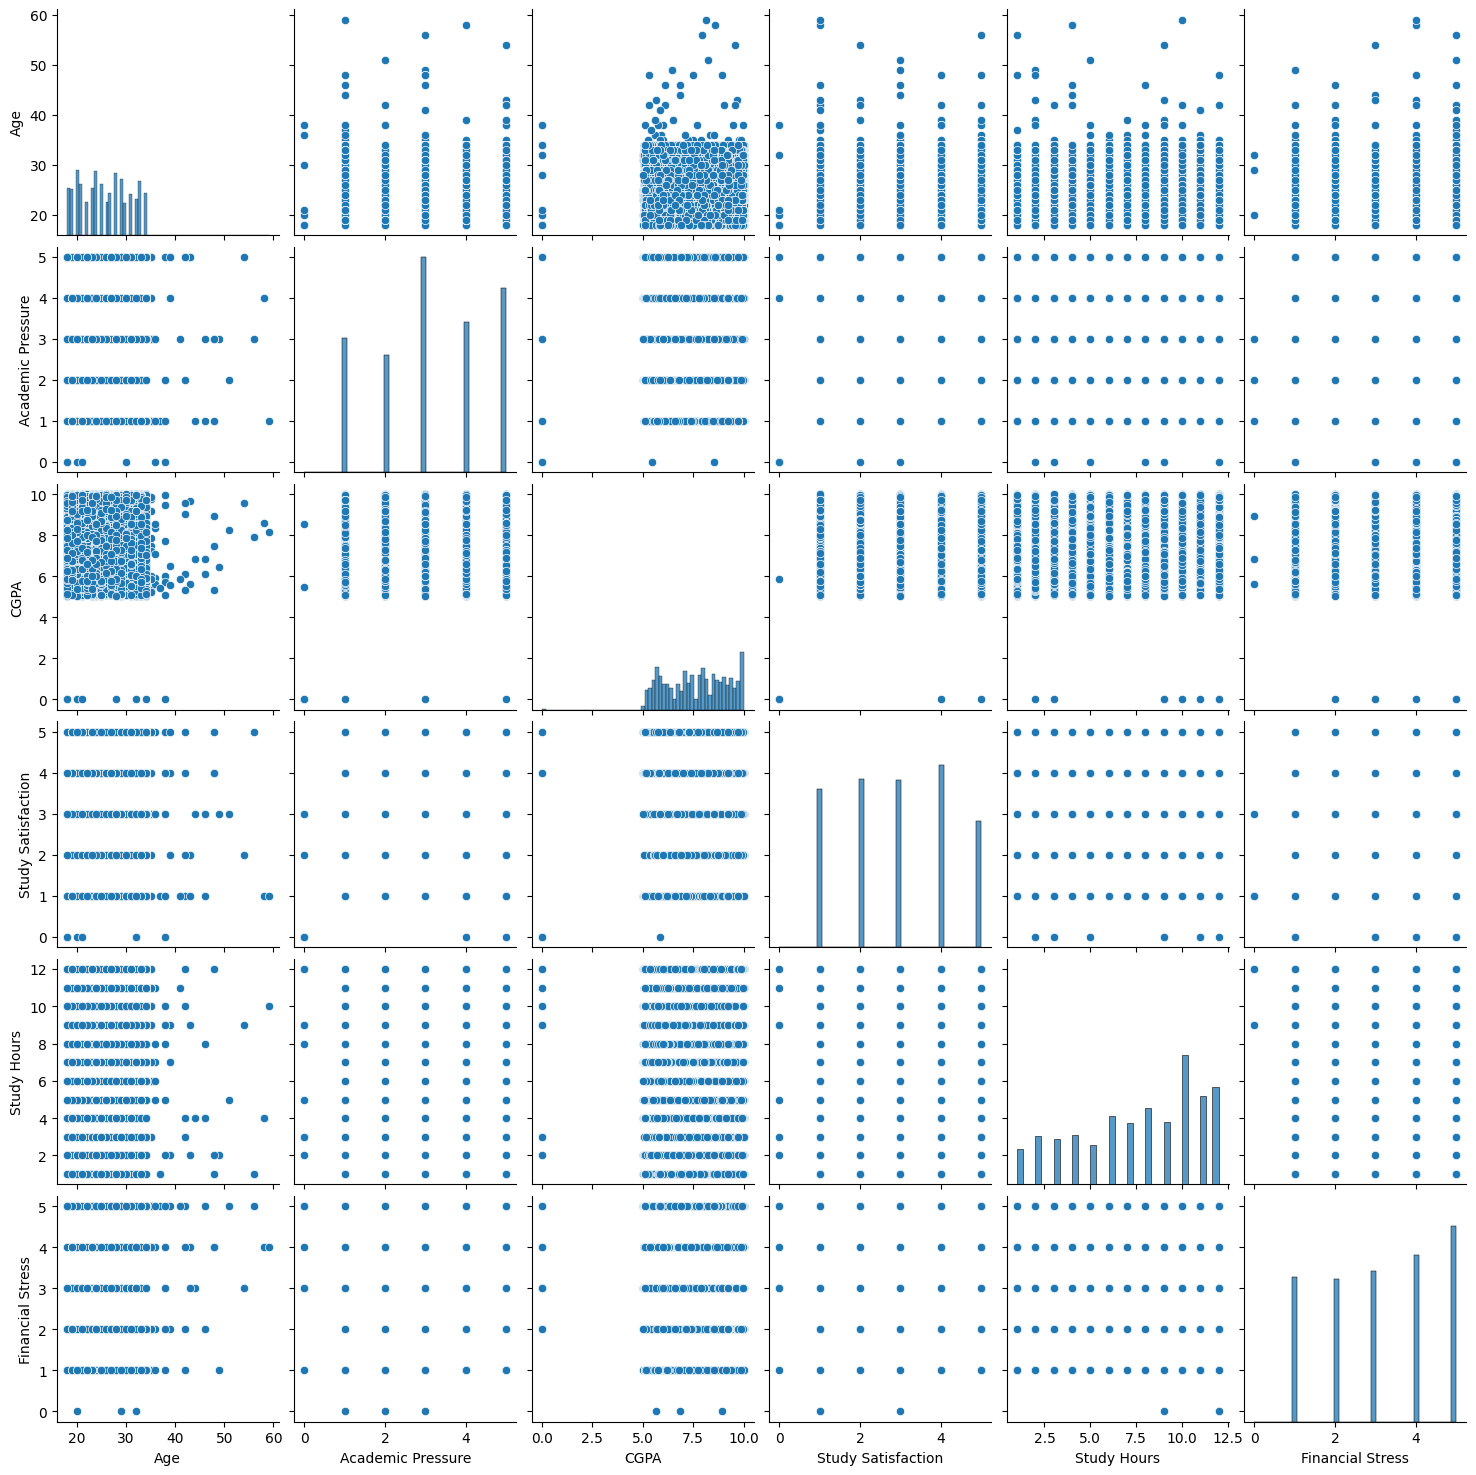

In [114]:
#Pairplot for 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Study Hours', 'Financial Stress', 'Depression'
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data[['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Study Hours', 'Financial Stress', 'Depression']])
plt.show()

C:\Users\Panget\AppData\Local\Temp\ipykernel_28616\497771367.py:6: FutureWarning: The provided callable <function mean at 0x0000023DAF311000> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(


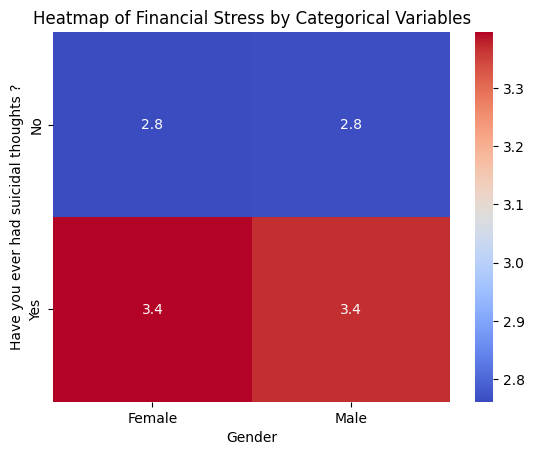

In [115]:
#Heatmap by Financial Stress by Suicidal Thoughts and Gender
import pandas as pd
import numpy as np

# Create a pivot table for the heatmap
pivot_table = pd.pivot_table(
    data,
    values='Financial Stress',  # Numerical variable
    index='Have you ever had suicidal thoughts ?',  # Categorical variable 1
    columns='Gender',  # Categorical variable 2
    aggfunc=np.mean
)

sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title(f"Heatmap of Financial Stress by Categorical Variables")
plt.show()

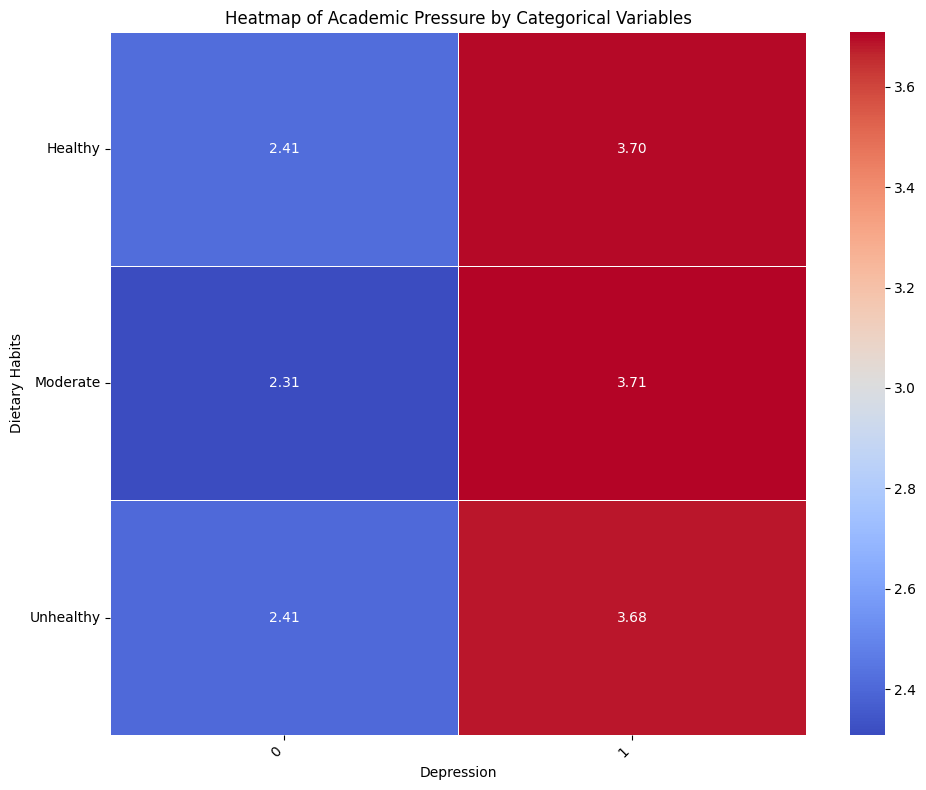

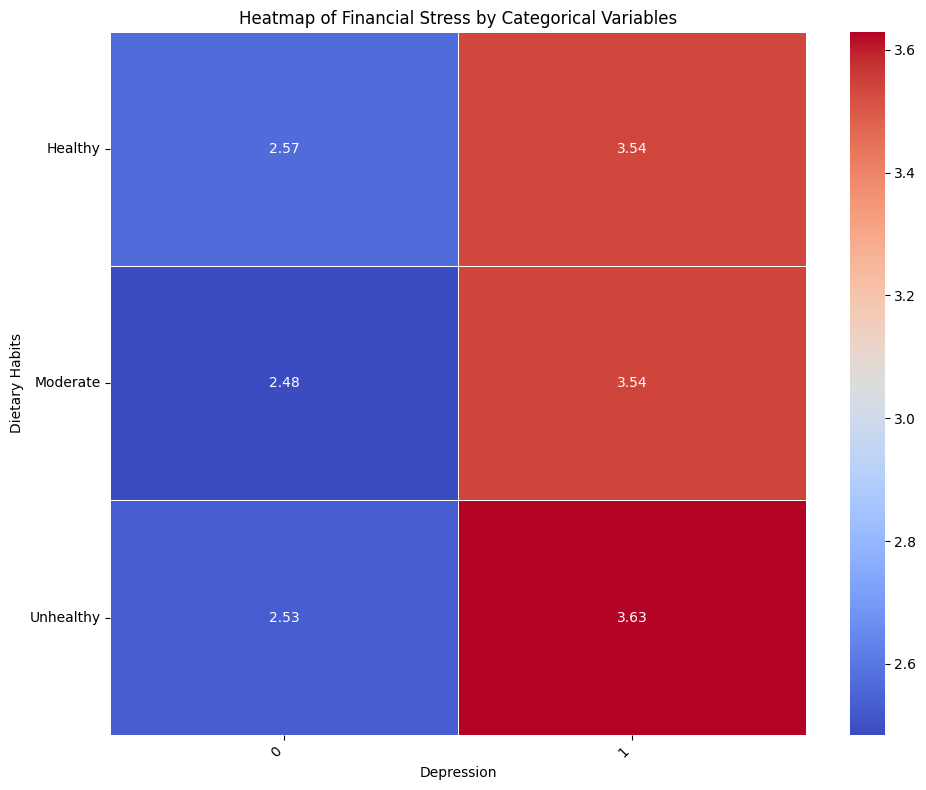

In [116]:
#Heatmap of Academic Pressure and Financial Stress by Dietary Habits and Depression
import pandas as pd

numerical_cols = ['Academic Pressure','Financial Stress']
categorical_cols = ['Dietary Habits','Depression']

# Loop through each numerical column and generate heatmaps
for num_col in numerical_cols:
    # Create a pivot table for the current numerical column
    pivot_table = pd.pivot_table(
        data, 
        values=num_col, 
        index=categorical_cols[0],  # Start with the first categorical variable
        columns=categorical_cols[1:],  # Other categorical variables
        aggfunc='mean',  # You can change this to other aggregates like median, sum, etc.
        dropna=False
    )

    # Create the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f"Heatmap of {num_col} by Categorical Variables")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

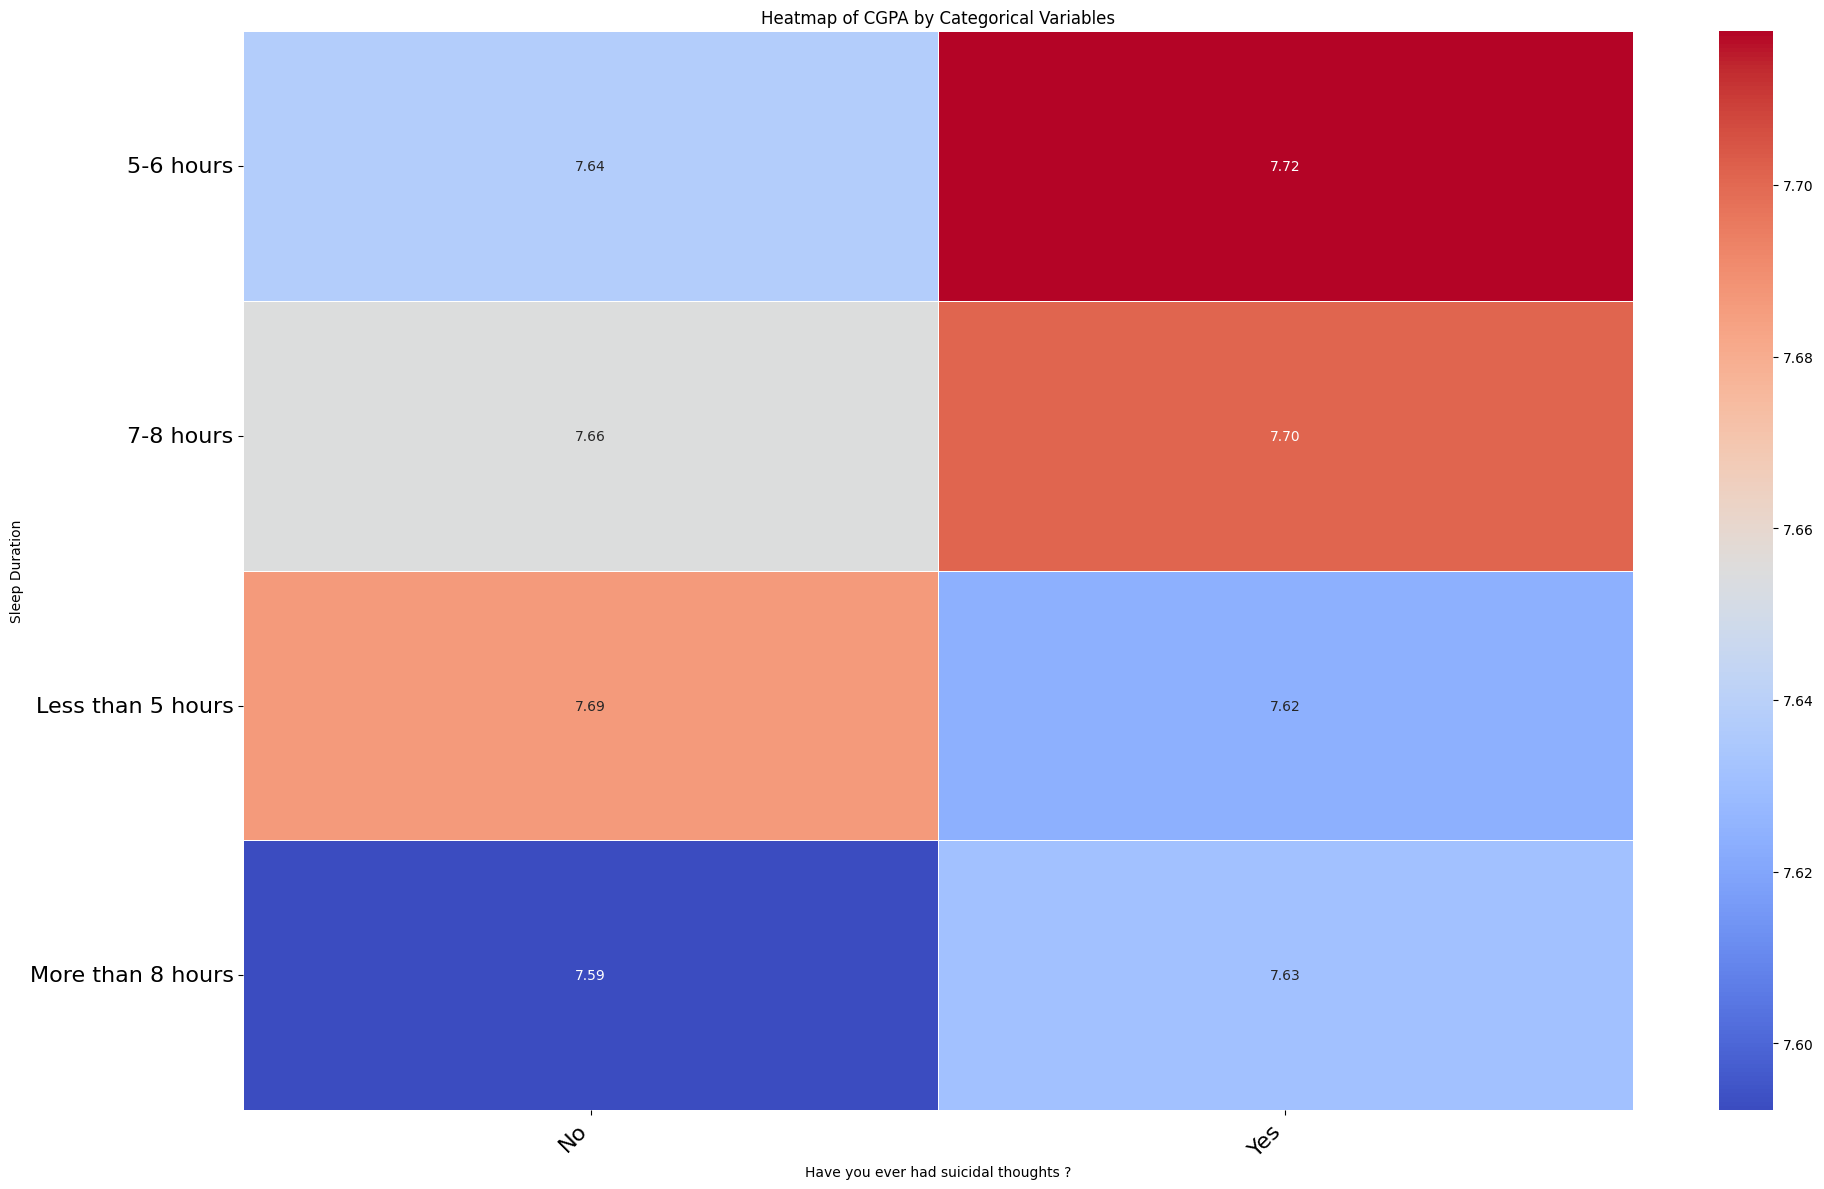

In [117]:
#Heatmap of CGPA by Sleep Duration and Suicidal Thoughts
import pandas as pd

numerical_cols = ['CGPA']
categorical_cols = ['Sleep Duration','Have you ever had suicidal thoughts ?']

# Loop through each numerical column and generate heatmaps
for num_col in numerical_cols:
    # Create a pivot table for the current numerical column
    pivot_table = pd.pivot_table(
        data, 
        values=num_col, 
        index=categorical_cols[0],  # Start with the first categorical variable
        columns=categorical_cols[1],  # Other categorical variables
        aggfunc='mean',  # You can change this to other aggregates like median, sum, etc.
        dropna=False
    )

    # Create the heatmap
    plt.figure(figsize=(20, 12))
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f"Heatmap of {num_col} by Categorical Variables")
    plt.xticks(rotation=45, ha="right",  fontsize=16)
    plt.yticks(rotation=0, fontsize=16)
    plt.tight_layout()
    plt.show()

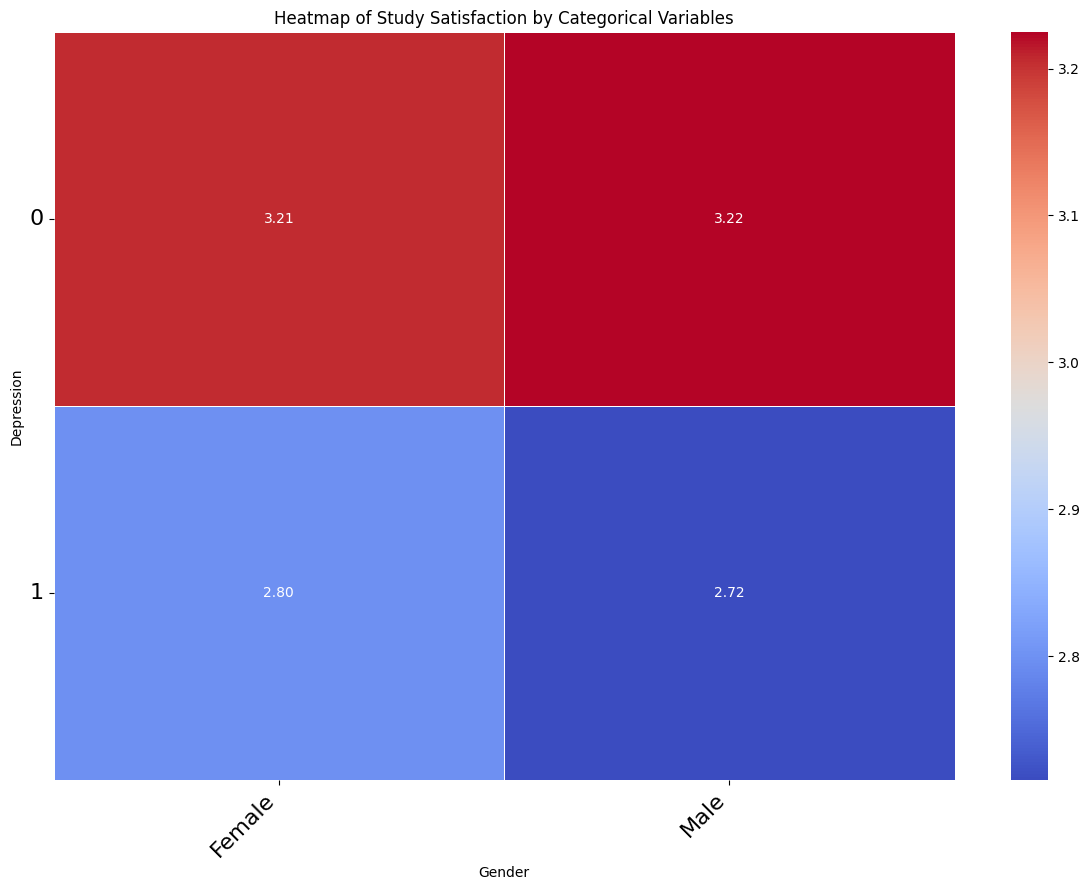

In [118]:
#Heatmap of Study Satisfaction by Sleep Duration and Suicidal Thoughts
import pandas as pd

numerical_cols = ['Study Satisfaction', ]
categorical_cols = ['Sleep Duration','Have you ever had suicidal thoughts ?']

# Loop through each numerical column and generate heatmaps
for num_col in numerical_cols:
    # Create a pivot table for the current numerical column
    pivot_table = pd.pivot_table(
        data, 
        values='Study Satisfaction', 
        index='Depression',  # Start with the first categorical variable
        columns='Gender',  # Other categorical variables
        aggfunc='mean',  # You can change this to other aggregates like median, sum, etc.
        dropna=False
    )

    # Create the heatmap
    plt.figure(figsize=(12, 9))
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f"Heatmap of {num_col} by Categorical Variables")
    plt.xticks(rotation=45, ha="right",  fontsize=16)
    plt.yticks(rotation=0, fontsize=16)
    plt.tight_layout()
    plt.show()

# Linear Regression <br>

## X = Study Hours
## Y = CGPA


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [120]:
# Prepare the data
X = data[['Study Hours']]  # Independent variable
Y = data['CGPA']  # Dependent variable

print(X.head())
print(Y.head())

   Study Hours
0            3
1            3
2            9
3            4
4            1
0    8.97
1    5.90
2    7.03
3    5.59
4    8.13
Name: CGPA, dtype: float64


In [121]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [122]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [123]:
# Make predictions
Y_pred = model.predict(X_test)

In [124]:
# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [125]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2.133081276341371
R^2 Score: -0.00013973031939085168


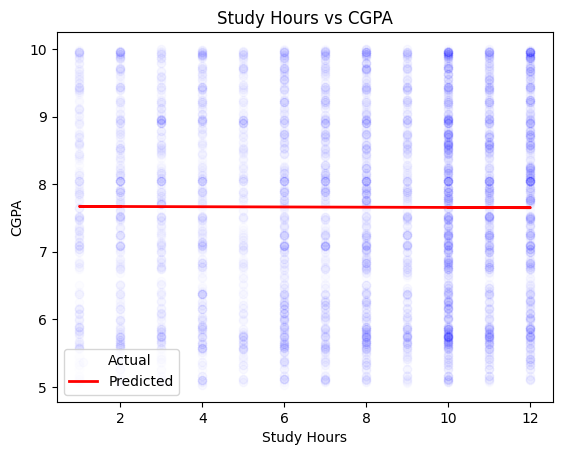

In [126]:
# Plot the results
plt.scatter(X_test, Y_test, color='blue', label='Actual', alpha=0.01)
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Study Hours')
plt.ylabel('CGPA')
plt.title('Study Hours vs CGPA')
plt.legend()
plt.show()

### Conclusion

There is no correlation between the two, as evident on the stagnant straight line. With n R^2 score on the negatives 0.0001. We could also conclude that there is absolutely no correlation between them.

In [131]:


from mlxtend.frequent_patterns import apriori, association_rules

numerical_columns = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Study Hours', 'Financial Stress', 'Depression']
categorical_columns = ['Gender', 'City', 'Sleep Duration', 'Dietary Habits', 'Degree', 
                       'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

all_columns = numerical_columns + categorical_columns
encoded_data = pd.get_dummies(data[all_columns], drop_first=True)
transactions = encoded_data.apply(lambda row: [col for col in encoded_data.columns if row[col] == 1], axis=1).tolist()

frequent_itemsets = apriori(encoded_data, min_support=0.4, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets)



c:\Users\Panget\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 33

In [129]:
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets), metric="confidence", min_threshold=0.3)
# print(rules)

filtered_rules = rules[
    (rules['antecedents'].apply(lambda x: len(x) > 0)) &  
    (rules['consequents'].apply(lambda x: len(x) > 0))   
]

filtered_rules = filtered_rules[filtered_rules['consequents'].apply(lambda x: len(x) == 1)]

print("Filtered Association Rules:")
print(filtered_rules)



NameError: name 'frequent_itemsets' is not defined

In [152]:
for i, r in filtered_rules.iterrows():
    print(f'{list(r["antecedents"])} -> {list(r["consequents"])}')


['Depression_1'] -> ['Have you ever had suicidal thoughts ?_Yes']
['Have you ever had suicidal thoughts ?_Yes'] -> ['Depression_1']
